<h1><center>Naive Introduction to $\lambda$ functions in Python</center></h1>

In [2]:
import numpy as np
import pandas as pd

import functools
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

### IIFEs 
Immediately Invoked Function Expressions. These are functions that are executed as soon as they are created. IIFEs require no explicit call to invoke the function. In Python, IIFEs can be created using the lambda function.

Here, I have created an IIFE that returns the square of a number:

In [3]:
(lambda x: x ** 2)(np.linspace(0,10,11))

array([  0.,   1.,   4.,   9.,  16.,  25.,  36.,  49.,  64.,  81., 100.])

In [4]:
df=pd.DataFrame({
    'id':[1,2,3,4,5],
    'name':['Jeremy','Frank','Janet','Ryan','Mary'],
    'age':[20,25,18,16,30],
    'income':[4000,7000,200,150,10000]
})

df.head()

,id,name,age,income
0,1,Jeremy,20,4000
1,2,Frank,25,7000
2,3,Janet,18,200
3,4,Ryan,16,150
4,5,Mary,30,10000


### Ages recorded with a difference of 3 years.
apply() function calls the lambda function and applies it to every row or column of the dataframe and returns a modified copy of the dataframe:

In [5]:
df['age'] = df.apply(lambda x: x['age'] + 3, axis = 1)
df.head()

,id,name,age,income
0,1,Jeremy,23,4000
1,2,Frank,28,7000
2,3,Janet,21,200
3,4,Ryan,19,150
4,5,Mary,33,10000


In [6]:
df['age'] = df['age'].apply(lambda x: x - 3)
df.head()

,id,name,age,income
0,1,Jeremy,20,4000
1,2,Frank,25,7000
2,3,Janet,18,200
3,4,Ryan,16,150
4,5,Mary,30,10000


### how many of these people are above the age of 18?

filter() function takes a lambda function and a Pandas series and applies the lambda function on the series and filters the data

This returns a sequence of True and False, which we use for filtering the data. Therefore, the input size of the filter() function is always greater than the output size.

In [7]:
list(filter(lambda x: x >= 25, df['age']))

[25, 30]

In [8]:
df[df['age'] >= 25]

,id,name,age,income
1,2,Frank,25,7000
4,5,Mary,30,10000


### The income of all the employees gets increased by 20%.
This map() function maps the series according to input correspondence. It is very helpful when we have to substitute a series with other values. In map() functions, the size of the input is equal to the size of the output.

In [9]:
df['income']=list(map(lambda x: int(x+x*0.2),df['income']))
df.head()

,id,name,age,income
0,1,Jeremy,20,4800
1,2,Frank,25,8400
2,3,Janet,18,240
3,4,Ryan,16,180
4,5,Mary,30,12000


### The total income all.
reduce() function applies the lambda function to the first two elements of the series and returns the result. Then, it stores that result and again applies the same lambda function to the result and the next element in the series. Thus, it reduces the series to a single value.

In [10]:
functools.reduce(lambda a,b: a + b,df['income'])

25620

### Categorize people into ‘Adult’ or ‘Child’.
Lambda functions also support conditional statements, such as if..else. This makes lambda functions very powerful.

In [11]:
df['category'] = df['age'].apply(lambda x: 'Adult' if x >= 18 else 'Child')
df.head()

,id,name,age,income,category
0,1,Jeremy,20,4800,Adult
1,2,Frank,25,8400,Adult
2,3,Janet,18,240,Adult
3,4,Ryan,16,180,Child
4,5,Mary,30,12000,Adult


If you want $c(a,b,\theta)$, to return $\sqrt{a^2+b^2-2ab\cos(\theta)}$

In [12]:
c = lambda a, b, theta: np.sqrt(a**2+b**2-2*a*b*np.cos(theta))

In [13]:
c

<function __main__.<lambda>(a, b, theta)>

$c$ is now actually a function handle that points to an anonymous function which takes three arguments. You can now use the function by putting numbers in for the arguments:

In [14]:
side_three = c(2, 3, np.pi/6)
print(side_three)

1.6148359528406395


Using $c$ to return entire arrays:

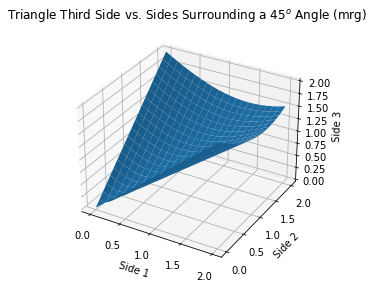

In [15]:
x,y = np.meshgrid(np.arange(0, 2.1, .1), np.arange(0, 2.1, 0.1))

fig = plt.figure(num=1)
fig.clf()
ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.plot_surface(x, y, c(x, y, np.pi/4))
ax.set(xlabel = 'Side 1', ylabel = 'Side 2', zlabel = 'Side 3')
ax.set(title = 'Triangle Third Side vs. Sides Surrounding a 45$^o$ Angle (mrg)')
fig.tight_layout()

Lambda functions can access variables in the console, and as such those variables must exist when a lambda function is called. If some part of a lambda function does not exist when the function is created, you will not see the error until the function is called.

In [16]:
fun = lambda x: x + a

In [17]:
fun(1)

NameError: name 'a' is not defined

In [18]:
a = 1

In [19]:
fun(1)

2

#### References:
__<a href="https://www.analyticsvidhya.com/blog/2020/03/what-are-lambda-functions-in-python/">Link to Reference \#1</a>__
<br>
__<a href="http://pundit.pratt.duke.edu/wiki/Python:Lambda_Function">Link to Reference \#2</a>__